In [1]:
from pandas import DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [2]:
df =pd.read_csv('D:\\New folder (8)\\P2.csv')

In [3]:
df

,Unnamed: 0,m/d/y,GS,WTI,DXY,DJI,FED,INF
0,1,"Jan 01, 2010",1097.35,79.61,77.86,10428.05,0.0025,0.025
1,2,"Jan 04, 2010",1120.40,81.64,77.53,10583.96,0.0025,0.025
2,3,"Jan 05, 2010",1119.05,81.47,77.62,10572.02,0.0025,0.025
3,4,"Jan 06, 2010",1138.90,83.25,77.49,10573.68,0.0025,0.025
4,5,"Jan 07, 2010",1132.30,82.69,77.91,10606.86,0.0025,0.025
...,...,...,...,...,...,...,...,...
2860,2861,"Dec 25, 2020",1875.82,47.93,90.32,30199.87,0.0025,0.025
2861,2862,"Dec 28, 2020",1871.19,47.87,90.34,30403.97,0.0025,0.025
2862,2863,"Dec 29, 2020",1877.99,47.94,89.99,30335.67,0.0025,0.025
2863,2864,"Dec 30, 2020",1893.37,48.22,89.68,30409.56,0.0025,0.025


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2865 non-null   int64  
 1   m/d/y       2865 non-null   object 
 2   GS          2865 non-null   float64
 3   WTI         2865 non-null   float64
 4   DXY         2865 non-null   float64
 5   DJI         2865 non-null   float64
 6   FED         2865 non-null   float64
 7   INF         2865 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 179.2+ KB


In [5]:
df['m/d/y']=pd.to_datetime(df['m/d/y'],infer_datetime_format=True)

array([<AxesSubplot:xlabel='m/d/y'>, <AxesSubplot:xlabel='m/d/y'>,
       <AxesSubplot:xlabel='m/d/y'>, <AxesSubplot:xlabel='m/d/y'>,
       <AxesSubplot:xlabel='m/d/y'>, <AxesSubplot:xlabel='m/d/y'>],
      dtype=object)

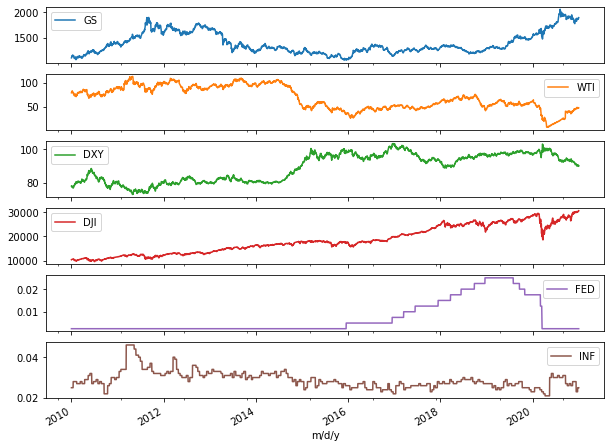

In [6]:
df.set_index('m/d/y')[['GS','WTI','DXY','DJI','FED','INF']].plot(subplots=True)

In [7]:
df_input=df[['GS','WTI','DXY','DJI','FED','INF']]

In [8]:
df_input

,GS,WTI,DXY,DJI,FED,INF
0,1097.35,79.61,77.86,10428.05,0.0025,0.025
1,1120.40,81.64,77.53,10583.96,0.0025,0.025
2,1119.05,81.47,77.62,10572.02,0.0025,0.025
3,1138.90,83.25,77.49,10573.68,0.0025,0.025
4,1132.30,82.69,77.91,10606.86,0.0025,0.025
...,...,...,...,...,...,...
2860,1875.82,47.93,90.32,30199.87,0.0025,0.025
2861,1871.19,47.87,90.34,30403.97,0.0025,0.025
2862,1877.99,47.94,89.99,30335.67,0.0025,0.025
2863,1893.37,48.22,89.68,30409.56,0.0025,0.025


In [9]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

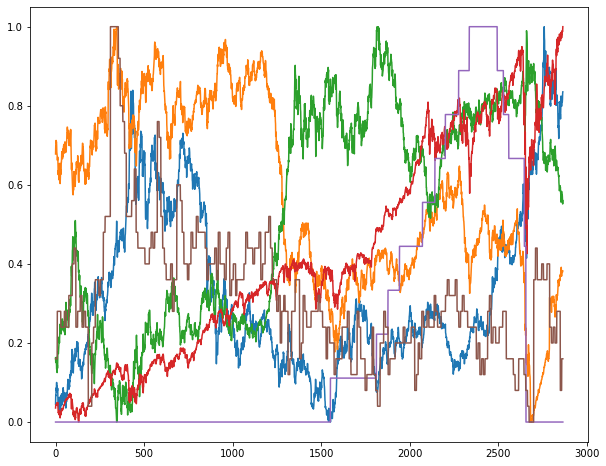

In [10]:
plt.plot(data_scaled)

In [11]:
data_scaled

array([[0.04509368, 0.6779309 , 0.16233125, 0.0354479 , 0.        ,
        0.16      ],
       [0.06788274, 0.69709269, 0.15146526, 0.04290057, 0.        ,
        0.16      ],
       [0.06654803, 0.69548801, 0.15442871, 0.04232983, 0.        ,
        0.16      ],
       ...,
       [0.81689653, 0.37898811, 0.56173856, 0.98705497, 0.        ,
        0.16      ],
       [0.83210243, 0.38163111, 0.55153112, 0.990587  , 0.        ,
        0.16      ],
       [0.83518711, 0.38210308, 0.5600922 , 1.        , 0.        ,
        0.16      ]])

In [12]:
features=data_scaled
target=data_scaled[:,0]

In [13]:
TimeseriesGenerator(features,target,length=6,sampling_rate=1,batch_size=32)[0]

(array([[[0.04509368, 0.6779309 , 0.16233125, 0.0354479 , 0.        ,
          0.16      ],
         [0.06788274, 0.69709269, 0.15146526, 0.04290057, 0.        ,
          0.16      ],
         [0.06654803, 0.69548801, 0.15442871, 0.04232983, 0.        ,
          0.16      ],
         [0.08617332, 0.71228998, 0.15014817, 0.04240918, 0.        ,
          0.16      ],
         [0.07964803, 0.70700396, 0.16397761, 0.04399522, 0.        ,
          0.16      ],
         [0.08389935, 0.70908061, 0.14948963, 0.04453681, 0.        ,
          0.16      ]],
 
        [[0.06788274, 0.69709269, 0.15146526, 0.04290057, 0.        ,
          0.16      ],
         [0.06654803, 0.69548801, 0.15442871, 0.04232983, 0.        ,
          0.16      ],
         [0.08617332, 0.71228998, 0.15014817, 0.04240918, 0.        ,
          0.16      ],
         [0.07964803, 0.70700396, 0.16397761, 0.04399522, 0.        ,
          0.16      ],
         [0.08389935, 0.70908061, 0.14948963, 0.04453681, 0.       

In [14]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [15]:
x_train.shape

(2292, 6)

In [16]:
x_test.shape

(573, 6)

In [17]:
win_length=500
batch_size=20
num_features=6
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)


In [18]:
train_generator[0]

(array([[[0.04509368, 0.6779309 , 0.16233125, 0.0354479 , 0.        ,
          0.16      ],
         [0.06788274, 0.69709269, 0.15146526, 0.04290057, 0.        ,
          0.16      ],
         [0.06654803, 0.69548801, 0.15442871, 0.04232983, 0.        ,
          0.16      ],
         ...,
         [0.65748183, 0.86567869, 0.20019756, 0.08934751, 0.        ,
          0.44      ],
         [0.68610411, 0.87521238, 0.17945341, 0.11277247, 0.        ,
          0.44      ],
         [0.6856592 , 0.87049273, 0.17780705, 0.11154637, 0.        ,
          0.44      ]],
 
        [[0.06788274, 0.69709269, 0.15146526, 0.04290057, 0.        ,
          0.16      ],
         [0.06654803, 0.69548801, 0.15442871, 0.04232983, 0.        ,
          0.16      ],
         [0.08617332, 0.71228998, 0.15014817, 0.04240918, 0.        ,
          0.16      ],
         ...,
         [0.68610411, 0.87521238, 0.17945341, 0.11277247, 0.        ,
          0.44      ],
         [0.6856592 , 0.87049273, 0.177

In [19]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dense(1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500, 128)          69120     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 500, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 500, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [21]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

History = model.fit_generator(train_generator,
                            epochs=500,
                            validation_data=test_generator,
                            shuffle=False,
                            callbacks=[early_stopping])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
90/90 [==============================] - 63s 703ms/step - loss: 0.0258 - mean_absolute_error: 0.1122 - val_loss: 0.3226 - val_mean_absolute_error: 0.5670
Epoch 2/500
90/90 [==============================] - 61s 683ms/step - loss: 0.0121 - mean_absolute_error: 0.0779 - val_loss: 0.3089 - val_mean_absolute_error: 0.5549
Epoch 3/500
90/90 [==============================] - 61s 681ms/step - loss: 0.0103 - mean_absolute_error: 0.0732 - val_loss: 0.2999 - val_mean_absolute_error: 0.5467
Epoch 4/500
90/90 [==============================] - 61s 681ms/step - loss: 0.0117 - mean_absolute_error: 0.0801 - val_loss: 0.3070 - val_mean_absolute_error: 0.5531
Epoch 5/500
90/90 [==============================] - 60s 667ms/step - loss: 0.0124 - mean_absolute_error: 0.0833 - val_loss: 0.3000 - val_mean_absolute_error: 0.5467
Epoch 6/500
90/90 [==============================] - 62s 688ms/step - loss: 0.0134 - mean_abso

In [22]:
model.evaluate_generator(test_generator,verbose=0)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.32720398902893066, 0.5710938572883606]

In [23]:
predictions=model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [24]:
predictions.shape[0]

73

In [25]:
predictions

array([[0.24715379],
       [0.24707863],
       [0.24691367],
       [0.24667901],
       [0.24637908],
       [0.24605092],
       [0.245751  ],
       [0.24547663],
       [0.24525046],
       [0.24507463],
       [0.24494058],
       [0.2448254 ],
       [0.24470589],
       [0.24458638],
       [0.24450451],
       [0.24444973],
       [0.24439052],
       [0.24433646],
       [0.24430022],
       [0.2442691 ],
       [0.24426067],
       [0.244268  ],
       [0.24430403],
       [0.24433842],
       [0.24435699],
       [0.24438655],
       [0.24444127],
       [0.24452138],
       [0.24459133],
       [0.24465397],
       [0.24471244],
       [0.24476114],
       [0.24478287],
       [0.24480507],
       [0.24485013],
       [0.2447963 ],
       [0.24464086],
       [0.24440786],
       [0.24415392],
       [0.24390966],
       [0.24367735],
       [0.24346158],
       [0.24327397],
       [0.24310759],
       [0.24297392],
       [0.24281612],
       [0.24257511],
       [0.242

In [26]:
y_test

array([0.1725938 , 0.16850067, 0.17671659, 0.18041426, 0.17844678,
       0.1797815 , 0.17598497, 0.16975629, 0.16095704, 0.17943546,
       0.17909931, 0.17752731, 0.17307825, 0.17238618, 0.16985516,
       0.15606308, 0.14722428, 0.14889515, 0.15736813, 0.15943448,
       0.16780859, 0.17035939, 0.16788769, 0.17230708, 0.1737209 ,
       0.16950912, 0.1686984 , 0.16110534, 0.16745267, 0.17030006,
       0.16829304, 0.17729992, 0.18469524, 0.18371645, 0.18414158,
       0.19412724, 0.19065698, 0.18903554, 0.19186317, 0.18856098,
       0.18435909, 0.19197192, 0.19540264, 0.18949034, 0.20605072,
       0.20195759, 0.21492906, 0.2128034 , 0.22095012, 0.22641752,
       0.22846409, 0.22825646, 0.23039201, 0.23950764, 0.23054031,
       0.23424786, 0.23096545, 0.23865737, 0.23198379, 0.23358545,
       0.23727322, 0.23488062, 0.23904296, 0.2374413 , 0.22714914,
       0.22595284, 0.23065895, 0.22804884, 0.22660537, 0.24863315,
       0.24893964, 0.25724455, 0.26513421, 0.26615255, 0.26324

In [27]:
x_test

array([[0.1725938 , 0.5814612 , 0.75008232, 0.75324379, 0.88888889,
        0.28      ],
       [0.16850067, 0.58221635, 0.75996049, 0.74717639, 0.88888889,
        0.28      ],
       [0.17671659, 0.55201057, 0.75831413, 0.7411544 , 0.88888889,
        0.28      ],
       ...,
       [0.81689653, 0.37898811, 0.56173856, 0.98705497, 0.        ,
        0.16      ],
       [0.83210243, 0.38163111, 0.55153112, 0.990587  , 0.        ,
        0.16      ],
       [0.83518711, 0.38210308, 0.5600922 , 1.        , 0.        ,
        0.16      ]])

In [28]:
x_test[:,1:][win_length:]

array([[0.30186898, 0.69344748, 0.84138145, 0.        , 0.24      ],
       [0.29847083, 0.70661837, 0.81628346, 0.        , 0.24      ],
       [0.30781574, 0.70530128, 0.81878394, 0.        , 0.24      ],
       [0.30592788, 0.71485018, 0.83592161, 0.        , 0.24      ],
       [0.31064754, 0.70299638, 0.85552486, 0.        , 0.24      ],
       [0.29714933, 0.69015476, 0.84924379, 0.        , 0.24      ],
       [0.3056447 , 0.69015476, 0.86497228, 0.        , 0.24      ],
       [0.29139135, 0.68422786, 0.86665488, 0.        , 0.24      ],
       [0.27760997, 0.6885084 , 0.86024522, 0.        , 0.2       ],
       [0.29828205, 0.67764241, 0.88251243, 0.        , 0.2       ],
       [0.30413442, 0.68356931, 0.86454493, 0.        , 0.2       ],
       [0.30658864, 0.68159368, 0.889913  , 0.        , 0.2       ],
       [0.31772702, 0.68093513, 0.89574713, 0.        , 0.2       ],
       [0.31159147, 0.66282516, 0.90346176, 0.        , 0.2       ],
       [0.30271852, 0.66315443, 0.

In [29]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [30]:
df_pred

,0,0,1,2,3,4
0,0.247154,0.301869,0.693447,0.841381,0.0,0.24
1,0.247079,0.298471,0.706618,0.816283,0.0,0.24
2,0.246914,0.307816,0.705301,0.818784,0.0,0.24
3,0.246679,0.305928,0.714850,0.835922,0.0,0.24
4,0.246379,0.310648,0.702996,0.855525,0.0,0.24
...,...,...,...,...,...,...
68,0.240689,0.378894,0.572605,0.980564,0.0,0.16
69,0.240738,0.378327,0.573263,0.990320,0.0,0.16
70,0.240770,0.378988,0.561739,0.987055,0.0,0.16
71,0.240792,0.381631,0.551531,0.990587,0.0,0.16


In [31]:
rev_trans=scaler.inverse_transform(df_pred)

In [32]:
rev_trans

array([[1.30172370e+03, 3.97700000e+01, 9.39900000e+01, 2.72881800e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30164768e+03, 3.94100000e+01, 9.43900000e+01, 2.67631300e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30148083e+03, 4.04000000e+01, 9.43500000e+01, 2.68154400e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30124348e+03, 4.02000000e+01, 9.46400000e+01, 2.71739600e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30094012e+03, 4.07000000e+01, 9.42800000e+01, 2.75840600e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30060821e+03, 3.92700000e+01, 9.38900000e+01, 2.74526600e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30030484e+03, 4.01700000e+01, 9.38900000e+01, 2.77817000e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.30002734e+03, 3.86600000e+01, 9.37100000e+01, 2.78169000e+04,
        2.50000000e-03, 2.70000000e-02],
       [1.29979858e+03, 3.72000000e+01, 9.38400000e+01, 2.76828100e+04,
        2.50000000e-03, 

In [33]:
df_final=df_input[predictions.shape[0]*-1:]

In [34]:
df_final.count()

GS     73
WTI    73
DXY    73
DJI    73
FED    73
INF    73
dtype: int64

In [35]:
df_final['GS_pred']=rev_trans[:,0]

<ipython-input-35-4e5b04094fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['GS_pred']=rev_trans[:,0]


In [36]:
df_final

,GS,WTI,DXY,DJI,FED,INF,GS_pred
2792,1899.28,39.77,93.99,27288.18,0.0025,0.027,1301.723700
2793,1863.55,39.41,94.39,26763.13,0.0025,0.027,1301.647678
2794,1868.04,40.40,94.35,26815.44,0.0025,0.027,1301.480833
2795,1860.05,40.20,94.64,27173.96,0.0025,0.027,1301.243483
2796,1880.85,40.70,94.28,27584.06,0.0025,0.027,1300.940118
...,...,...,...,...,...,...,...
2860,1875.82,47.93,90.32,30199.87,0.0025,0.025,1295.184657
2861,1871.19,47.87,90.34,30403.97,0.0025,0.025,1295.234455
2862,1877.99,47.94,89.99,30335.67,0.0025,0.025,1295.266527
2863,1893.37,48.22,89.68,30409.56,0.0025,0.025,1295.289467


<AxesSubplot:>

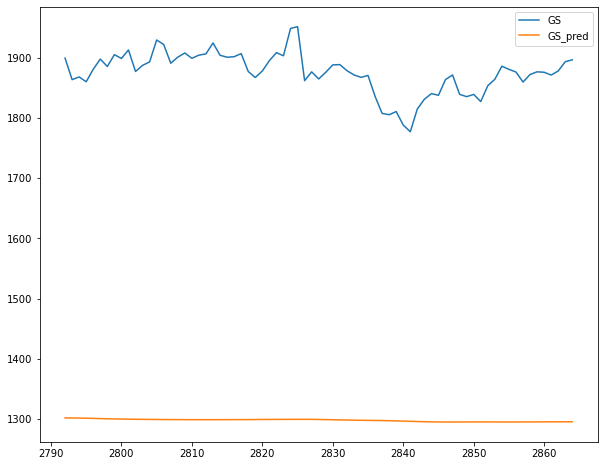

In [37]:
df_final[['GS','GS_pred']].plot()